# Lab 8: Define and Solve an ML Problem of Your Choosing

In [18]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [19]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the data set Airbnb NYC "listings" data set: airbnbListingsData.csv. As someone who likes to travel with family and relatives, I am interested in trying to work out my ML model with airbnb data.
   
2. I will predict the overall review score of a listing based on features 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_value', 'review_scores_communication'. The label is 'review_scores_rating'.

3. This is a supervised learning problem as I will train a model to make predictions. This is a regression problem as I will predict 'review_scores_rating', a numerical value based on numerical data points.
   
4. My features are 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_value', 'review_scores_communication'.
   
5. This is important because people are constantly traveling whether it be for education purposes, exploration purposes, or personal purposes. My family loves to travel and we enjoy stay at hotels and Airbnbs. A company can use this model to predict overall review score of an Airbnb listing. People can see how high rating some Airbnbs are based on this model and make wise decisions on where they want to stay when they travel.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [20]:
df.head()
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           28022 non-null 

(28022, 50)

In [21]:
# This code checks for missing values.
missing_values = df.isnull().sum()
print(missing_values)
# This code drops rows with missing values.
df = df.dropna(subset=['review_scores_rating'])
df.shape

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

(28022, 50)

In [22]:
# Replaces missing values with mean for numerical columns.
num_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [23]:
print(df.isnull().sum())

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                        

In [24]:
# Convert boolean columns to integers
boolean_columns = ['host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability','instant_bookable']
df[boolean_columns] = df[boolean_columns].astype(int)

In [25]:
#I will use Linear Regression model. I will need to do one-hot encoding.
categorical_columns = ['neighbourhood_group_cleansed', 'room_type']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [26]:
#Handles outliers
for col in num_cols:
    df[col] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])
#Scales Numerical Features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

 - I do not have a new feature list. It is still the same features: 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_value', 'review_scores_communication'.

 - I completed a few different data preparation techniques. First, I checked for missing values and then dropped rows with missing values. Next, I replaced missing values with mean for numerical columns. The following technique I used was convert boolean columns to integers. After this, I did one-hot encoding. Finally, I handled outliers and scaled numerical fetaures.

 - I will use Linear Regression model.

 - I will import packages as needed. X will be df of my features and y will be my label. I will train_test_split as we have always done. Then, I will use model LinearRegression() and fit data. After this, I will find MSE (Mean Squared Error) and R squared value for my model. Next, I will test model by adding some new data for features. I made sure to test out data with both Ridge Regression model and Lasso Regression model. At the end, I compared all three models and analyzed.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [27]:
# YOUR CODE HERE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [28]:
# YOUR CODE HERE
X = df[['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_value', 'review_scores_communication']]
y = df['review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Mean Squared Error for Linear Regression: ", mse)
print("R-squared Value for Linear Regression: ", r2)

Mean Squared Error for Linear Regression:  0.23849344956296006
R-squared Value for Linear Regression:  0.7638083230931528


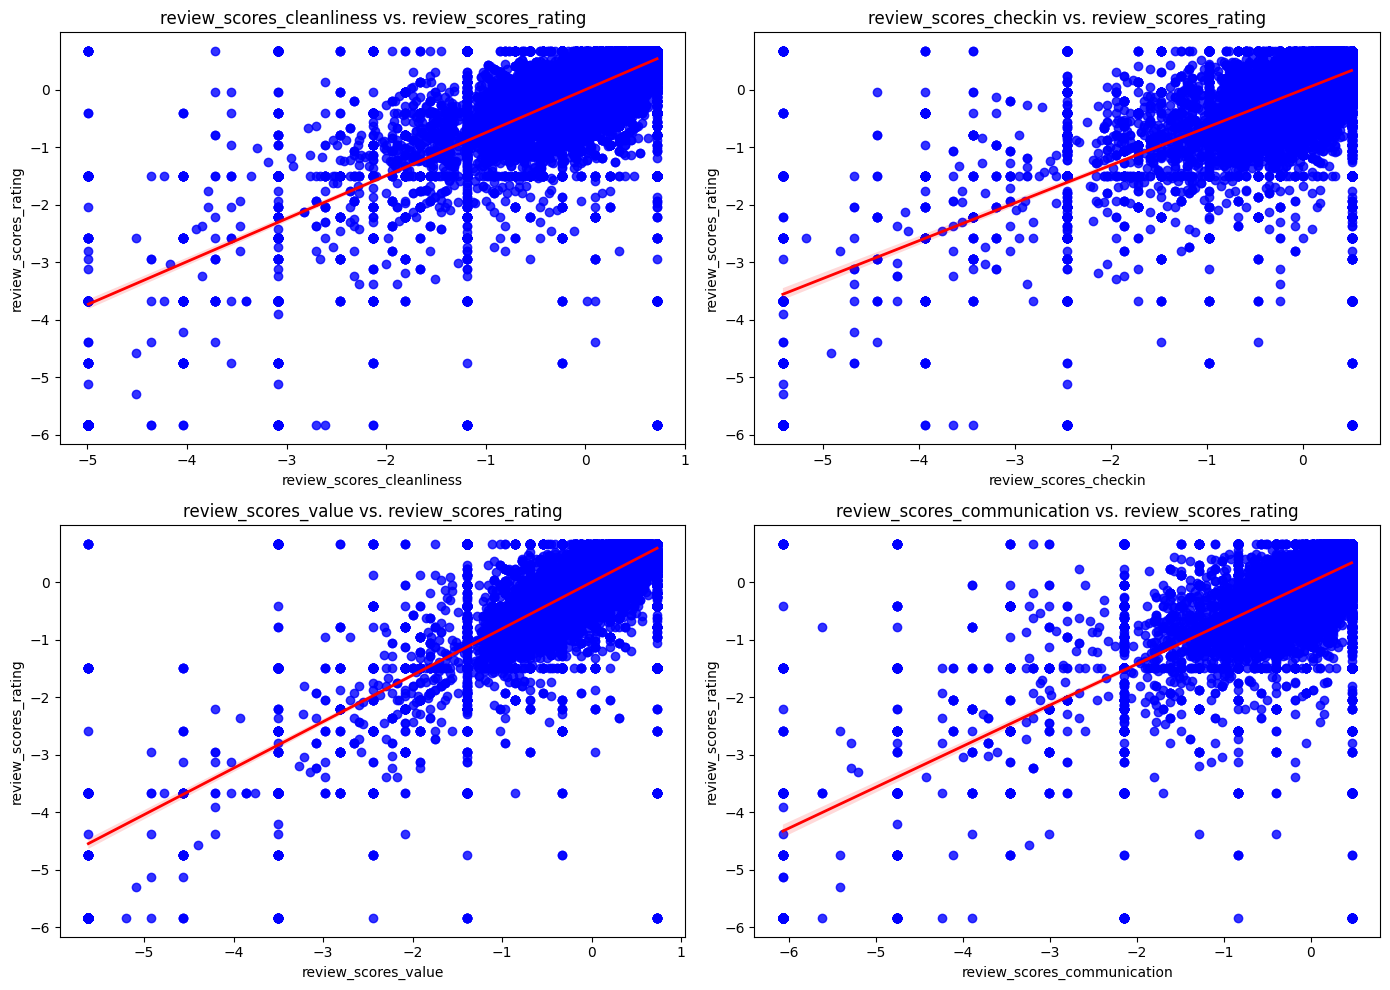

In [29]:
# Visualize
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
features = ['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_value', 'review_scores_communication']
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.regplot(x=df[feature], y=df['review_scores_rating'], ax=axes[i], scatter_kws={'color': 'blue'}, line_kws={'color':'red', 'linewidth':2})
    axes[i].set_title(f'{feature} vs. review_scores_rating')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('review_scores_rating')
plt.tight_layout()
plt.show()

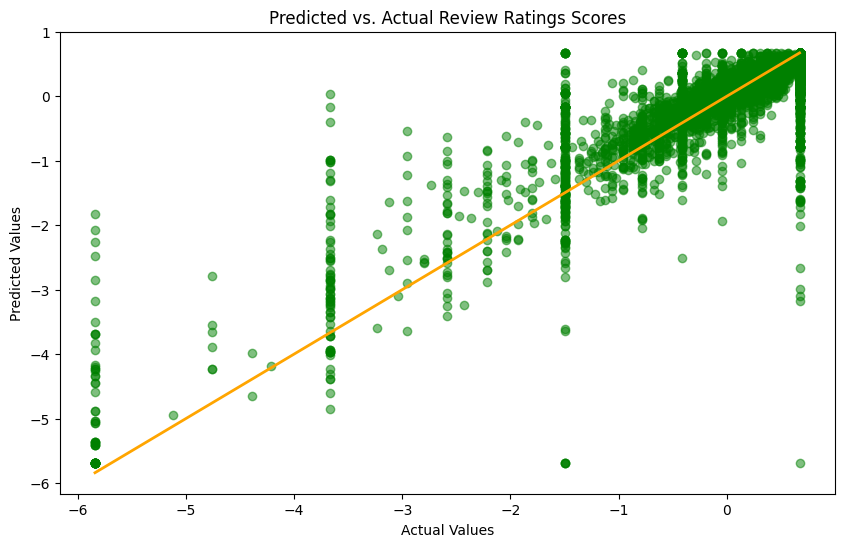

In [30]:
# Show Actual vs Predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_predict, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Review Ratings Scores')
plt.show()

In [31]:
# Test model by adding some new data for features
new_data = pd.DataFrame({
    'review_scores_cleanliness':[4.2], 
    'review_scores_checkin': [3.7], 
    'review_scores_value': [4.5], 
    'review_scores_communication':[3.9]
})

predicted_review_score = model.predict(new_data)
print("Predicted review rating score for features with new_data: ", predicted_review_score)

Predicted review rating score for features with new_data:  [4.35076581]


In [32]:
# Test out Ridge model
ridge = Ridge()
param_grid = {'alpha':[0.1, 1.0, 10.0, 100.0]}
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
best_ridge_model = grid_search_ridge.best_estimator_

y_pred_ridge = best_ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Mean Squared Error for Ridge: ", mse_ridge)
print("R-squared Value for Ridge: ", r2_ridge)

Mean Squared Error for Ridge:  0.2384943924868113
R-squared Value for Ridge:  0.7638073892697458


In [33]:
# Test out Lasso model
lasso = Lasso()
param_grid = {'alpha':[0.1, 1.0, 10.0, 100.0]}
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)
best_lasso_model = grid_search_lasso.best_estimator_

y_pred_lasso = best_lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Mean Squared Error for Lasso: ", mse_lasso)
print("R-squared Value for Lasso: ", r2_lasso)

Mean Squared Error for Lasso:  0.24971757401682623
R-squared Value for Lasso:  0.7526925260705183


In [34]:
#Test which model is best for MSE, MSE Error, and R Squared Value
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

param_grids = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso Regression': {'alpha': [0.1, 1.0, 10.0, 100.0]}
}

for name, model in models.items():
    print(f"Evaluating {name}")
    
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best Parameters: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train, y_train)
    
    # Cross-validation 
    cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Cross-Validation MSE: {-np.mean(cv_scores):.6f}")

    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error on Test Set: {mse:.6f}")
    print(f"R-squared Value on Test Set: {r2:.6f}")
    
    # Coefficients for Ridge and Lasso
    if name in ['Ridge Regression', 'Lasso Regression']:
        print(f"Coefficients: {best_model.coef_}")
    
    print("\n")

Evaluating Linear Regression
Cross-Validation MSE: 0.220715
Mean Squared Error on Test Set: 0.238493
R-squared Value on Test Set: 0.763808


Evaluating Ridge Regression
Best Parameters: {'alpha': 10.0}
Cross-Validation MSE: 0.220716
Mean Squared Error on Test Set: 0.238494
R-squared Value on Test Set: 0.763807
Coefficients: [0.32558067 0.10878128 0.3942966  0.20672305]


Evaluating Lasso Regression
Best Parameters: {'alpha': 0.1}
Cross-Validation MSE: 0.238662
Mean Squared Error on Test Set: 0.249718
R-squared Value on Test Set: 0.752693
Coefficients: [0.27781585 0.07119022 0.36958353 0.17473345]




Analysis:
For the 3 models, the MSE in order from smallest value to largest value is Linear Regression, Ridge Regression, and then Lasso regression. Smaller MSE value means it performs better during cross validation. Thus, for MSE, Linear Regression performed best.

For the 3 models, the MSE Error in order from smallest value to largest value is Linear Regression, Ridge Regression, and then Lasso regression. Smaller MSE error value means it performs better with unseen, new data. Thus, for MSE Error, Linear Regression performed best.

For the 3 models, the R squared value in order from smallest value to largest value is Linear Regression, Ridge Regression, and then Lasso regression. Smaller MSE error value means it has less variance in data. Thus, for R squared value, Linear Regression performed best.

In conclusion, Linear Regression model performed best for MSE, MSE Error, and R Squared Value. Second best is Ridge Regression. It will be very beneficial when working with data that deals with overfitting. The worst model of these three models is the Lasso Regression. 